This notebook procedes the Data Wrangling notebook for the case study of diabetes. In this book, detailed exploratory data analysis will be performed to understand the general relationship between the independent variables and target variable. 

In [27]:
import pandas as pd
import numpy as np
import pandas_profiling 
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/diabetes_data_upload.csv')

1. Closer look on 'duplicates'

In [4]:
df[df.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


In [18]:
df[(df['Age'] ==38) & (df['Gender'] =='Female') & (df['Polyuria'] == 'Yes') & (df['Polydipsia'] == 'Yes')\
  &(df['sudden weight loss'] == 'Yes') & (df['weakness'] == 'Yes') & (df['Polyphagia'] == 'Yes') & \
   (df['Genital thrush'] == 'No') & (df['visual blurring'] == 'Yes')]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
86,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
264,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
361,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
452,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive


Does duplicates have more class of 'positive'?

In [23]:
df[df.duplicated()]['class'].value_counts(normalize = True)

Positive    0.546468
Negative    0.453532
Name: class, dtype: float64

In [24]:
df[~df.duplicated()]['class'].value_counts(normalize = True)

Positive    0.689243
Negative    0.310757
Name: class, dtype: float64

In [25]:
df['class'].value_counts(normalize = True)

Positive    0.615385
Negative    0.384615
Name: class, dtype: float64

The above suggested that for the ones unique, compared to the ones duplicated, Positives take a larger portion (69% vs 55%). So it's most likely not the case that positives are being manually duplicated to fight imbalance. With the patient labeling, it's hard to tell whether those duplicated records belong to the same patient or different patients. But for the purpose of having relatively more balanced data, we shouldn't delete any 'duplicates'. 

2. Numeric variable(s)

<AxesSubplot:xlabel='Age', ylabel='Count'>

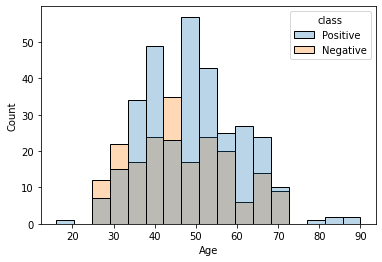

In [28]:
sns.histplot(data = df, x = 'Age', hue = 'class',alpha = 0.3)

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='class', ylabel='Age'>

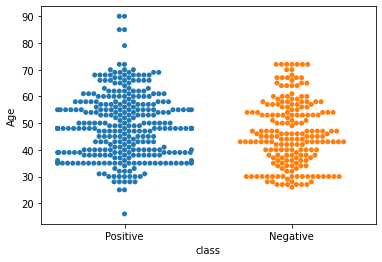

In [30]:
sns.swarmplot(data = df, x = 'class', y = 'Age')

It seems like age over 75 is a threhold as all cases are positive above that age;
<br>There is one case of positive below the age 20;
<br>Both positive cases and negative cases are spread out between age 25 to 75.

In [31]:
df[df['Age']<20]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive


Based on the above case, is 'sudden weight loss' or 'Polyphagia' a critical indicator of diabete? 

3. Categorical variables

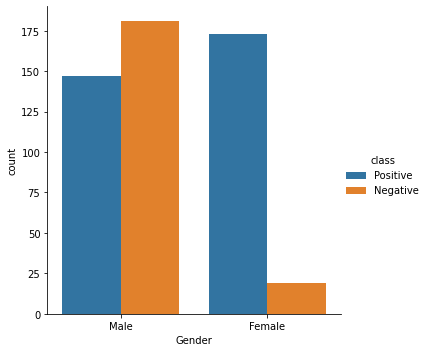

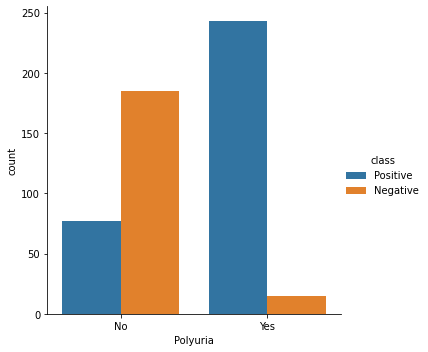

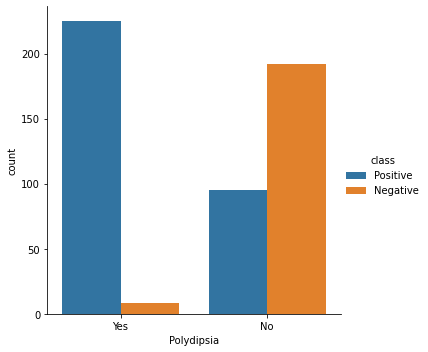

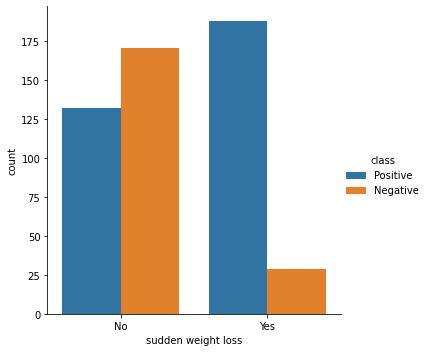

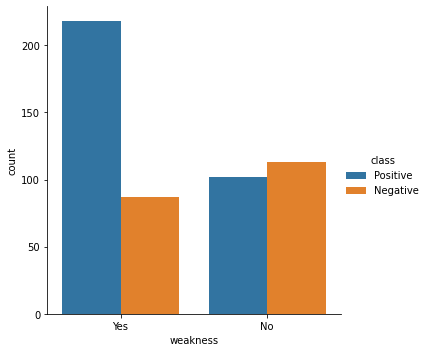

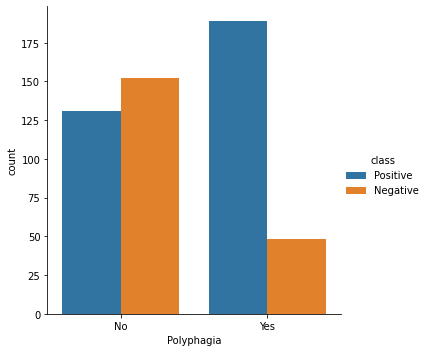

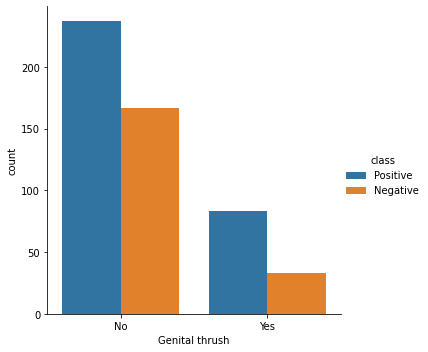

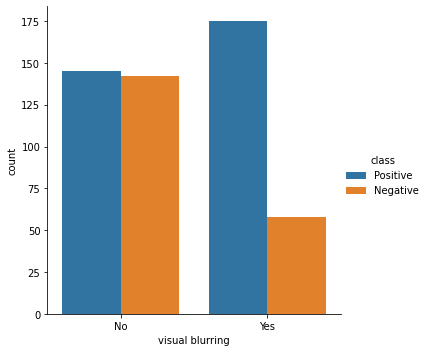

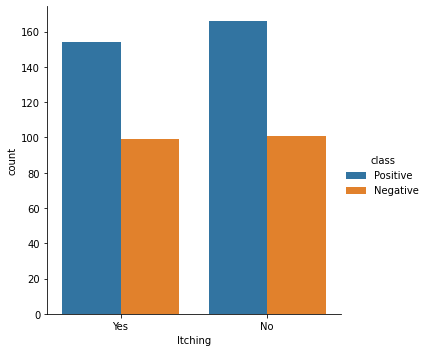

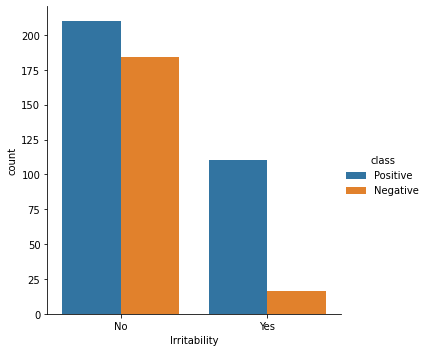

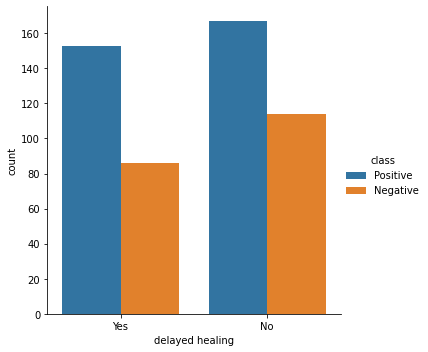

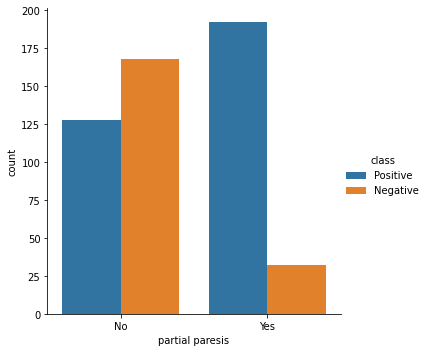

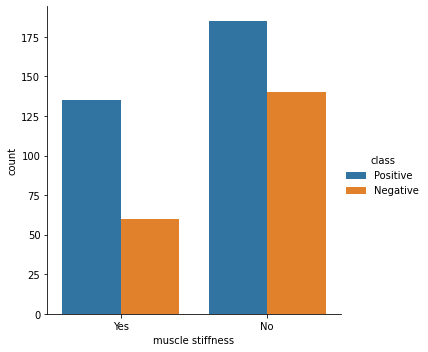

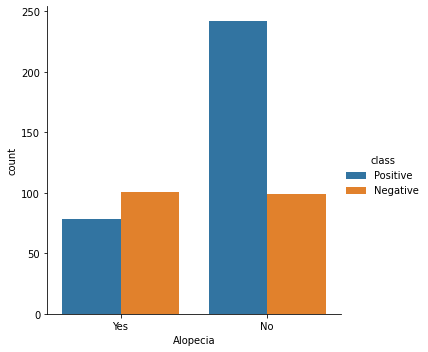

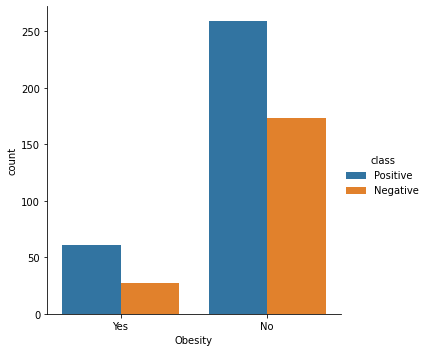

In [43]:
for col in df.columns:
    if col not in ['Age','class']:
        sns.catplot(data = df, hue = 'class',kind = 'count', x = col)

The graphs shows these associated (but not necessarily causal) relashionships with Diabetes:
<br> Female have larger potion of positive than male
<br> Polyuria positively correlates
<br> Polydipsia positively correlates
<br> Sudden weight loss positively correlates
<br> Weakness positively correlates
<br> Polyphagia positively correlates
<br> Genital thrush negatively correlates
<br> visual blurring positively correlates
<br> Itching no correlation
<br> Irritability positively correlates
<br> delayed heaing no correlation
<br> partial paresis positively correlates
<br> muscle stiffness positively correlates
<br> Alopecia negatively correlates
<br> obesity no corrlation (This appears to contradict some theories and calls for attention when comes to modeling)

4. Profile Report (not required)

In [26]:
pr = ProfileReport(df, title = 'Profile Report')
pr.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This completes the notebook of EDA. The numerica variable doesn't appear to have strong relationship except for the ones above 75 or below 20 years old. Some categorical variables appear to be correlated with positive diabetes. <br>Positive correlation includes Polyuria/Polydipsia/Sudden weight loss/Weakness/Polyphagia/visual blurring/Irritability/partial paresis/muscle stiffness
<br>Negative correlation includes Genital thrush/Alopecia
<br>No correlation includes Itching/delayed heaing/obesity

The next notebook will be on feature engineering.